In [2]:
import numpy as np
import matplotlib.pyplot as plt

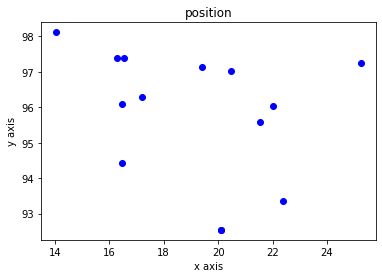

In [8]:
# solu = np.array([[2,1],
#                 [1,5],
#                 [2,8],
#                 [4,9],
#                 [7,8],
#                 [9,5],
#                 [8,1],
#                 [5,1],
#                 [4,3],
#                 [7,2]])

pos = np.array([[16.47, 96.10],
                 [16.47, 94.44],
                 [20.09, 92.54],
                 [22.39, 93.37],
                 [25.23, 97.24],
                 [22.00, 96.05],
                 [20.47, 97.02],
                 [17.20, 96.29],
                 [16.30, 97.38],
                 [14.05, 98.12],
                 [16.53, 97.38],
                 [21.52, 95.59],
                 [19.41, 97.13],
                 [20.09, 92.55]])

num = len(pos)

solu = np.arange(num)

#绘图

x = pos[:,0]
y = pos[:,1]
plt.title("position") 
plt.xlabel("x axis") 
plt.ylabel("y axis")
plt.plot(x,y,"ob") 
plt.show()

In [86]:
# 求某个解的距离
def distence2point(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

def dis(pos):
    c = len(pos)
    all = 0
    for i in range(c-1):
        all += distence2point(pos[i],pos[i+1])
    all += distence2point(pos[c-1],pos[0])
    return all

In [87]:
# 绘图 绘制某个解的图 和 绘制某个染色体中部分解
def plot(pos):
    x = pos[:,0]
    y = pos[:,1]
    x = np.append(x, pos[0,0])
    y = np.append(y, pos[0,1])
    plt.title("Path And Point") 
    plt.xlabel("x axis") 
    plt.ylabel("y axis")
    plt.plot(x,y,"r")
    plt.show()
    
def plotChrs(chrs, title = 'None Title'):
    fig = plt.figure()
    gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
    axs = gs.subplots(sharex='col', sharey='row')
    fig.suptitle(title)
    for i in (0, 1):
        for j in (0, 1):
            temp = np.random.randint(len(chrs))
            chr = chrs[temp]
            x = chr[:,0]
            y = chr[:,1]
            x = np.append(x, chr[0,0])
            y = np.append(y, chr[0,1])
            axs[i][j].plot(x,  y)

In [88]:
# 初始化染色体
def initChrs(n):
    chrs = []
    for i in range(n):
        temp = solu.copy()
        np.random.shuffle(temp)
        chrs.append(temp)
    return chrs

# 查看所有染色体的距离（调试用）
def viewAll(chrs):
    for i in chrs:
        print(dis(i))
        
# 获取种群中最佳染色体
def getBest(chrs):
    best = 0
    for j in range(1, len(chrs)):
        if (dis(chrs[best]) > dis(chrs[j])):
            best = j
    return chrs[best]

In [89]:
#选择
def select(chrs, correction = 0):
    n = len(chrs)
    sum = 0
    possibility = []
    allDis = []
    for i in chrs:
        d = dis(i)
        allDis.append(d)
        # sum += 1 / (d - correction)
        sum += np.random.random()
        possibility.append(sum)

    childlen = round(len(chrs) * 0.9)
    parentlen = len(chrs) - childlen
    sort = np.argsort(allDis)
    new_chrs = []

    for i in range(parentlen):
        new_chrs.append(chrs[sort[i]].copy())
    
    for i in range(childlen):
        temp = np.random.random() * sum
        for j in range(n):
            if (temp < possibility[j]):
                new_chrs.append(chrs[j].copy())
                break
    return new_chrs

In [90]:
#交叉(两点交叉)

def crossTwo(chr1, chr2):
    a, b = np.random.choice(range(len(chr1) + 1), 2, False)
    a, b = min(a, b), max(a, b)
    chr1[a: b], chr2[a: b] = chr2[a: b], chr1[a: b].copy()
    
    m = a
    while (m < b):
        flag = False
        for n in list(range(0,a))+list(range(b, len(chr1))):
            temp = chr1.copy()
            if (np.all(chr1[m]==chr1[n])):
                chr1[n]=chr2[m]
                flag = True
                break
            if (np.all(chr2[m]==chr2[n])):
                chr2[n]=temp[m]
                flag = True
                break
        if (flag):
            m = a
            continue
        m = m + 1
        
def cross(chrs, p):
    n = len(chrs)
    i = 0
    while (i < n):
        if (np.random.random() < p):
            crossTwo(chrs[i], chrs[i + 1])
        i += 2


In [91]:
#变异
def mutantSingle(chr):
    # a, b = np.random.choice(range(len(chr)), 2, False)
    a = np.random.randint(len(chr) - 1)
    b = a + 1
    chr[a], chr[b] = chr[b], chr[a].copy()
    
def mutant(chrs, p):
    for c in chrs:
        if (np.random.random() < p):
            mutantSingle(c)

In [92]:
#逆转
def reverseSingle(chr):
    a, b = np.random.choice(range(len(chr) + 1), 2, False)
    a, b = min(a, b), max(a, b)
    chr[a : b] = np.flip(chr[a : b], axis=0)
    
def reverse(chrs):
    for i in range(len(chrs)):
        temp = chrs[i].copy()
        reverseSingle(temp)
        if (dis(temp) < dis(chrs[i])):
            chrs[i] = temp

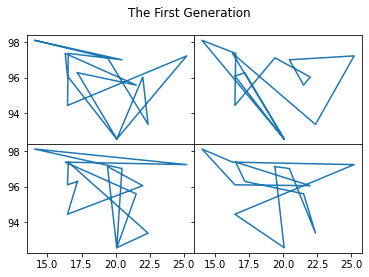

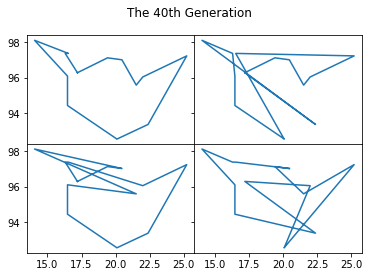

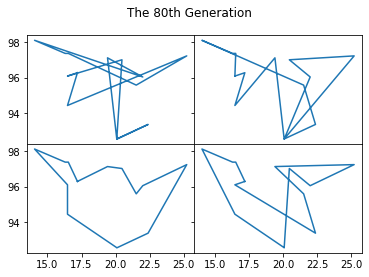

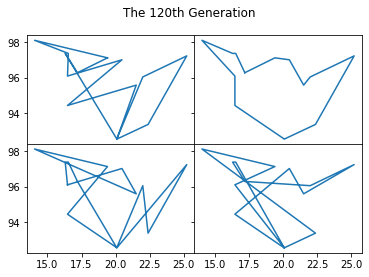

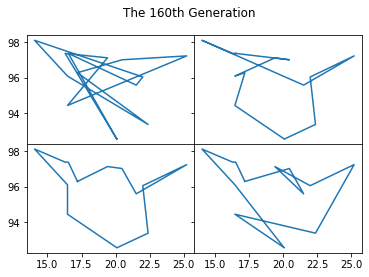

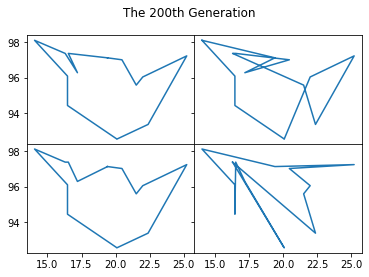

In [93]:
# m代数 vrate变异率 crate交叉率

m = 200
mrate = 0.05
crate = 0.9

allDis = [] #存储历代距离变化，

# 初始化种群
chrs = initChrs(100)

plotChrs(chrs, 'The First Generation')

best = dis(getBest(chrs))
        
allDis.append(best)


for i in range(m):

    #交叉
    cross(chrs, crate)

    #变异
    mutant(chrs, mrate)
    
    #逆转
    reverse(chrs)
    
    #选择
    chrs = select(chrs)
    
    #每隔40代绘图一次：
    if (i % 40 == 39):
        plotChrs(chrs, 'The ' + str(i + 1) + 'th Generation')
    
    best = dis(getBest(chrs))
        
    allDis.append(best)

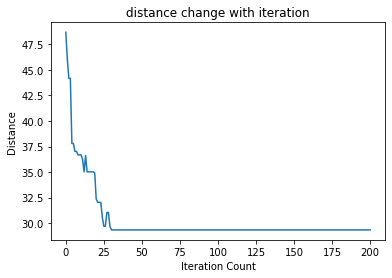

最终解
29.340520066994223
[[19.41 97.13]
 [20.47 97.02]
 [21.52 95.59]
 [22.   96.05]
 [25.23 97.24]
 [22.39 93.37]
 [20.09 92.54]
 [20.09 92.55]
 [16.47 94.44]
 [16.47 96.1 ]
 [14.05 98.12]
 [16.3  97.38]
 [16.53 97.38]
 [17.2  96.29]]


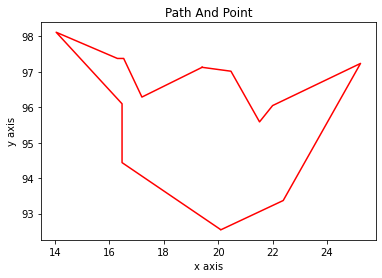

In [94]:
# 距离随温度变化
x = list(range(len(allDis)))
y = allDis
plt.title("distance change with iteration") 
plt.xlabel("Iteration Count") 
plt.ylabel("Distance")
plt.plot(x,y) 
plt.show()

# 展示最终结果
print("最终解")
best = getBest(chrs)
print(dis(best))
print(best)
plot(best)